In [108]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
from matplotlib.ticker import AutoLocator

import numpy as np

from nltk.corpus import stopwords

from collections import OrderedDict

import re
import glob
from datetime import datetime, timedelta
import pickle
import cPickle

In [2]:
auth_tuple = re.compile(r'^\(\(([^,]*),([^,]*),([^\)]*)\),([0-9]*)')

In [3]:
year = "2011"
fn = "/Users/rcordell/Development/MIDS-251/data/{0}/authorperday_counts/part-0*".format(year)
part_files = glob.glob(fn)

In [4]:
len(part_files)

2119

In [ ]:
# Postings counts only
postings = {}
hour = {}
for f in part_files:
    for line in open(f,"r"):
        match = auth_tuple.match(line)
        if match:
            author = match.group(2)
            subreddit = match.group(1)
            dt = datetime.strptime(match.group(3).split('T')[0], '%Y-%m-%d')
            count = int(match.group(4))
            
            # accumulate postings
            if dt not in postings.keys():
                postings[dt]=count
            else:
                postings[dt] += count



In [151]:
# save the postings
fn = "/Users/rcordell/Development/MIDS-251/data/{0}/postings.pkl".format(year)
of = open(fn, 'wb')
cPickle.dump(postings, of, -1)
of.close()

In [8]:
# load the postings if already saved
fn = "/Users/rcordell/Development/MIDS-251/data/{0}/postings.pkl".format(year)
with open(fn,'rn') as pkl_file:
    postings = cPickle.load(pkl_file)

In [ ]:
# 2008-12-13T00:00:00.000-06:00
postings = {}
hour = {}
for f in part_files:
    for line in open(f,"r"):
        match = auth_tuple.match(line)
        if match:
            author = match.group(2)
            subreddit = match.group(1)
            dt = datetime.strptime(match.group(3).split('T')[0], '%Y-%m-%d')
            count = int(match.group(4))
            if dt not in hour.keys():
                hour[dt]={subreddit: {author: count}}
            elif subreddit not in hour[dt].keys():
                hour[dt][subreddit]= {author: count}
            elif author not in hour[dt][subreddit]:
                hour[dt][subreddit][author] = count
            else:
                hour[dt][subreddit][author] += count
        

In [ ]:
#days = sorted(hour.keys())
#days_plot = []
#posts = []
#for i, day in enumerate(days):
#    posts_in_day = 0
#    for sr in hour[day].keys():
#        for a in hour[day][sr].keys():
#            posts_in_day += hour[day][sr][a]
#    posts.append(posts_in_day)
#    days_plot.append(day)    

In [35]:
# calculate by day
days = sorted(postings.keys())
days_plot = []
posts = []
for i, day in enumerate(days):
    posts.append(postings[day])
    days_plot.append(day)

In [55]:
#>>> import datetime
#>>> today = datetime.date.today()
#>>> margin = datetime.timedelta(days = 3)

#>>> today - margin <= datetime.date(2011, 1, 15) <= today + margin

# calculate by month
margin = timedelta(days = 30)
start_date = datetime(2011, 6, 1)

days = sorted(postings.keys())

posts = []
days_plot = []
for day in days:
    # pull out just one month of December
    if (day.month in range(4,7)) & (day.year == 2011):
        posts.append(postings[day])
        days_plot.append(day)

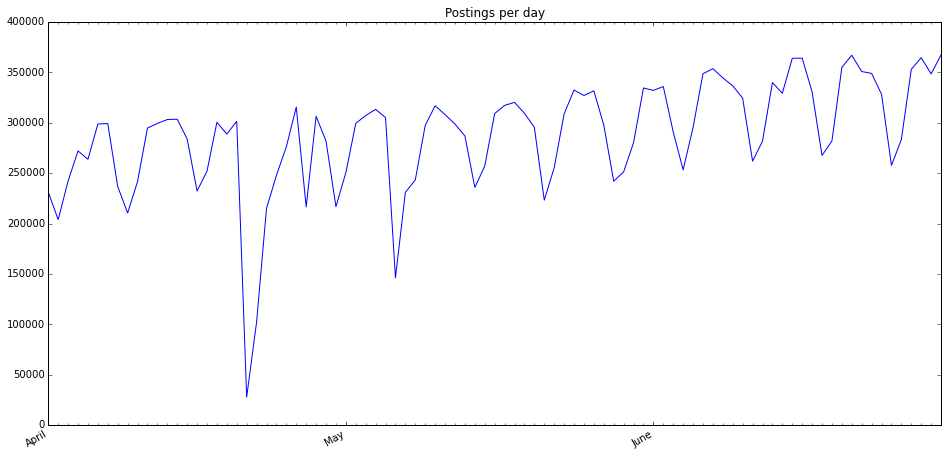

In [54]:
fig = plt.figure(figsize=(16,8))
#fig, ax = plt.subplots()
#fig_size = (16,8)
p = plt.subplot(1,1,1)
plt.title("Postings per day")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.plot(days_plot, posts)
plt.gcf().autofmt_xdate()

In [56]:
word_tuple = re.compile(r'^\(([0-9]*),([a-z]+)')

In [151]:
year = "2014"
fn = "/Users/rcordell/Development/MIDS-251/data/{0}/counts_filtered/part-0*".format(year)
part_files = glob.glob(fn)
len(part_files)

1671

In [ ]:
# Postings counts only
words = {}
stop = set(stopwords.words('english'))
stop.add('deleted')
for f in part_files:
    for line in open(f,"r"):
        match = word_tuple.match(line)
        if match:
            # match group 1 is the count, group 2 is the word
            word = match.group(2)
            count = match.group(1)
            if (word not in stop):
                if (word not in words):
                    words[word]=int(count)
                else:
                    words[word] += int(count)
                    
words_sorted_by_freq = OrderedDict(sorted(words.items(), key=lambda x: int(x[1]), reverse=True))

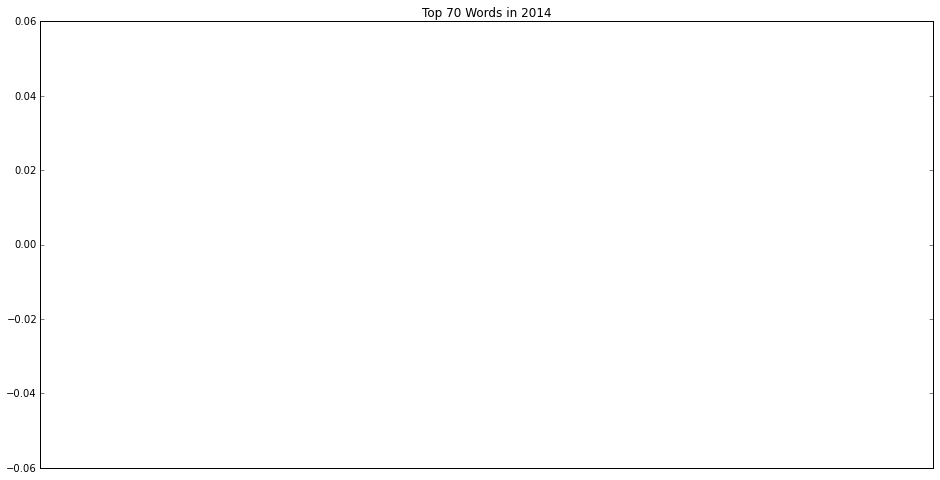

In [150]:
n = 70
fig = plt.figure(figsize=(16,8))
p = plt.subplot(1,1,1)
the_words = words_sorted_by_freq.keys()[:n]
the_counts = words_sorted_by_freq.values()[:n]

# Plot histogram using matplotlib bar().
indexes = np.arange(len(the_words))

width = 1.0
plt.bar(indexes, the_counts, width, color='green')
plt.xticks(indexes + width * 0.5, the_words)
p.set_xticklabels(the_words,rotation=90)
plt.title("Top {0} Words in {1}".format(n, year))
plt.savefig("{0}_top70.png".format(year))
plt.show()

In [ ]:
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")